In [1]:
import pandas as pd
import numpy as np
import scipy as scipy

%matplotlib inline
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

rawdata = pd.read_csv('https://data.cdc.gov/api/views/u6jv-9ijr/rows.csv?accessType=DOWNLOAD&bom=true&format=true%20target=')

rawdata = rawdata[rawdata['Jurisdiction'] != 'United States']

Text(0.5, 1.0, 'Number of deaths per year up to this week, divided by cause subgroup')

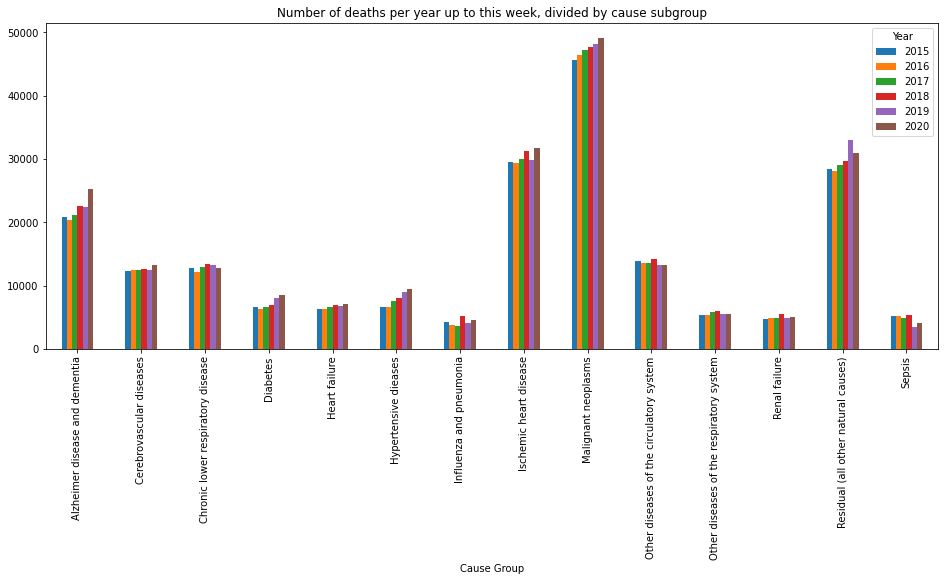

In [2]:
state = 'Texas'
statedata = rawdata[rawdata['Jurisdiction'] == state]

statedatatocurrentweek = statedata[statedata['Week'] <= statedata[statedata['Year'] == 2020]['Week'].max()]

statedeathtable = statedatatocurrentweek.groupby(['Year', 'Cause Group']).sum().reset_index().pivot(index='Cause Group', columns='Year', values='Number of Deaths')

ax = statedeathtable.plot.bar(figsize=(16,6))
ax.set_title('Number of deaths per year up to this week, divided by cause subgroup')



In [3]:
statedatatocurrentweek = statedata[statedata['Week'] <= statedata[statedata['Year'] == 2020]['Week'].max()]

pre2020averages = statedatatocurrentweek[statedatatocurrentweek['Year'] < 2020].groupby(['Year', 'Cause Group']).sum()[['Number of Deaths']].groupby(['Cause Group']).mean()

pre2020averages['Number of Deaths 2020'] = statedatatocurrentweek[statedatatocurrentweek['Year'] == 2020].groupby(['Cause Group']).sum()['Number of Deaths']

pre2020averages['Percent Change'] = (pre2020averages['Number of Deaths 2020'].div(pre2020averages['Number of Deaths']) - 1) * 100

#pre2020averages.sort_values('Percent Change', ascending=False)[['Number of Deaths', 'Number of Deaths 2020']].plot.bar(figsize=(16,9))


In [4]:
totalNumberOfDeaths = pre2020averages[['Number of Deaths', 'Number of Deaths 2020']].sum()['Number of Deaths 2020']
averageNumberOfDeaths = pre2020averages[['Number of Deaths', 'Number of Deaths 2020']].sum()['Number of Deaths']

print('Death percentage change over 2015-2019: ' + str((totalNumberOfDeaths / averageNumberOfDeaths - 1) *100))

Death percentage change over 2015-2019: 6.0670606811848105


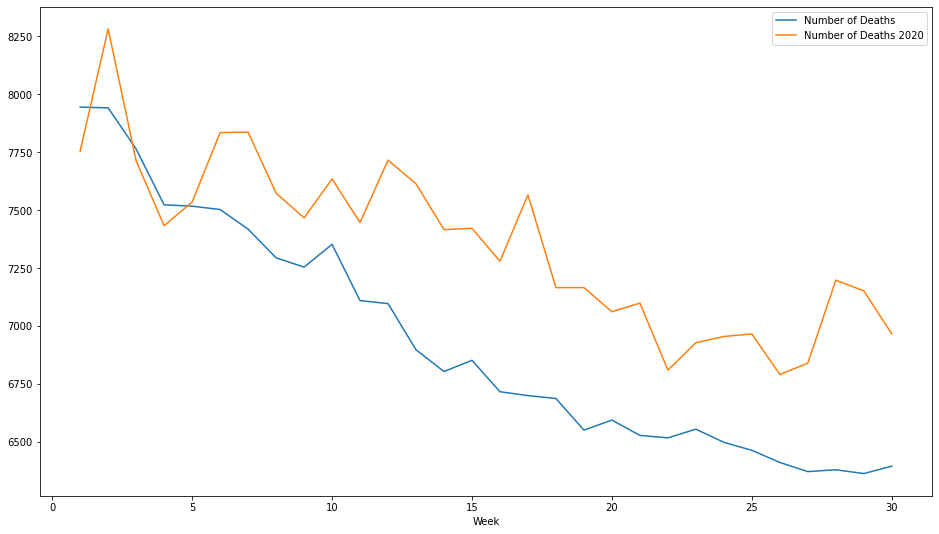

In [5]:
statedatatocurrentweek = statedata[statedata['Week'] <= statedata[statedata['Year'] == 2020]['Week'].max()]

pre2020averages = statedatatocurrentweek[statedatatocurrentweek['Year'] < 2020].groupby(['Year', 'Week']).sum()[['Number of Deaths']].groupby(['Week']).mean()

pre2020averages['Number of Deaths 2020'] = statedatatocurrentweek[statedatatocurrentweek['Year'] == 2020].groupby(['Week']).sum()['Number of Deaths']

pre2020averages['Percent Change'] = (pre2020averages['Number of Deaths 2020'].div(pre2020averages['Number of Deaths']) - 1) * 100

pre2020averages[['Number of Deaths', 'Number of Deaths 2020']].plot.line(figsize=(16,9))



In [6]:
import matplotlib.pyplot as plt

certainstates = ['Texas', 'Colorado', 'New York', 'New Jersey', 'Florida', 'Colorado']

gte2020 = rawdata[rawdata['Year'] == 2020].groupby(['Jurisdiction', 'Week'])[['Number of Deaths']].sum()
maxweek = gte2020.reset_index()['Week'].max()
lt2020 = rawdata[(rawdata['Year'] < 2020) & (rawdata['Week'] <= maxweek)].groupby(['Jurisdiction', 'Year', 'Week']).sum()[['Number of Deaths']].groupby(['Jurisdiction', 'Week']).mean()#.rename(columns={'Number of Deaths': 'Avg'})

compareData = lt2020.copy().rename(columns={'Number of Deaths':'Average'})

compareData['2020'] = gte2020['Number of Deaths']

compareData = compareData.fillna(0)

compareData['Difference'] = (compareData['2020'].div(compareData['Average']) * 100) - 100

compareData = compareData.reset_index()
#compareData = compareData[compareData['Jurisdiction'].isin(certainstates)]

pivottable = compareData.pivot(index='Week', columns='Jurisdiction', values='Difference')

pivottable['Week Ending'] = pd.to_datetime(rawdata[rawdata['Year'] == 2020].groupby(['Week'])['Week Ending Date'].max())
pivottable = pivottable.reset_index().set_index('Week Ending').drop(['Week'], axis=1)

states = pivottable.columns

In [7]:
pivottable = pivottable.rolling(window=4).mean().dropna()

Text(0.5, 1.0, "Who's peaking right now?")

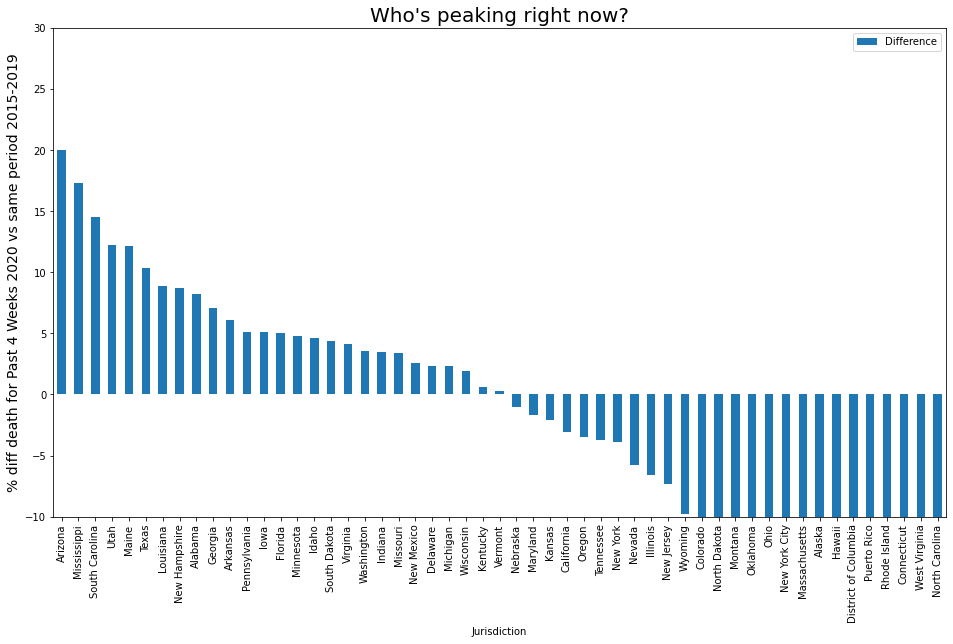

In [8]:
certainstates = ['Texas', 'Colorado', 'New York', 'Oklahoma', 'Mississippi', 'Louisiana']

gte2020 = rawdata[rawdata['Year'] == 2020].groupby(['Jurisdiction', 'Week'])[['Number of Deaths']].sum()
maxweek = gte2020.reset_index()['Week'].max()
lt2020 = rawdata[(rawdata['Year'] < 2020) & (rawdata['Week'] <= maxweek)].groupby(['Jurisdiction', 'Year', 'Week']).sum()[['Number of Deaths']].groupby(['Jurisdiction', 'Week']).mean()#.rename(columns={'Number of Deaths': 'Avg'})

compareData = lt2020.copy().rename(columns={'Number of Deaths':'Average'})
#compareData['2020'] = gte2020['Number of Deaths']

#pd.merge(lt2020.reset_index(), gt2020.reset_index(), left_on=['Jurisdiction', 'Week', 'Year'])
compareData['2020'] = gte2020['Number of Deaths']

compareData = compareData.fillna(0)

compareData['Difference'] = (compareData['2020'].div(compareData['Average']) * 100) - 100

compareData = compareData.reset_index()
#compareData = compareData[compareData['Jurisdiction'].isin(certainstates)]

pivottable = compareData[(compareData['Week'] > maxweek - 4)].reset_index()[['Jurisdiction', 'Difference']].groupby(['Jurisdiction']).mean() #.pivot(index='Jurisdiction', values='Difference')

ax = pivottable.sort_values('Difference', ascending=False).plot.bar(figsize=(16,9), ylim=(-10, 30))
ax.set_ylabel('% diff death for Past 4 Weeks 2020 vs same period 2015-2019', size=14)
ax.set_title('Who\'s peaking right now?', size=20)
#ax.ylim(-50, 50)
#ax.axhline(color='black')
#ax.set_title('2020 Death Percentage compared to Average')


In [9]:
rawdata[(rawdata['Year'] == 2017)].groupby(['Cause Group']).sum()

,Year,Week,Number of Deaths,Average Number of Deaths in Time Period,Difference from 2015-2019 to 2020,Percent Difference from 2015-2019 to 2020
Cause Group,,,,,,
Alzheimer disease and dementia,10254428,134278,525012.0,518736,0.0,0.0
Cerebrovascular diseases,9233826,120956,288994.0,286858,0.0,0.0
Chronic lower respiratory disease,9463764,123394,316850.0,310800,0.0,0.0
Diabetes,8080102,105834,165836.0,164510,0.0,0.0
Heart failure,7236996,93776,151938.0,151974,0.0,0.0
Hypertensive dieases,7741246,101874,174396.0,174120,0.0,0.0
Influenza and pneumonia,6514910,81206,101652.0,100274,0.0,0.0
Ischemic heart disease,10827256,141952,737920.0,733768,0.0,0.0
Malignant neoplasms,11113670,146004,1207174.0,1203920,0.0,0.0


In [10]:
rawdata.describe()

,Year,Week,Number of Deaths,Average Number of Deaths in Time Period,Difference from 2015-2019 to 2020,Percent Difference from 2015-2019 to 2020
count,329932.000000,329932.000000,329912.000000,329932.000000,17019.000000,17019.000000
mean,2017.320454,25.127602,83.763776,83.762069,3.038780,6.279811
std,1.621167,14.990656,113.397316,110.807771,24.667337,27.349480
min,2015.000000,1.000000,11.000000,11.000000,-286.000000,-84.600000
25%,2016.000000,12.000000,24.000000,24.000000,-4.000000,-8.800000
50%,2017.000000,24.000000,45.000000,46.000000,2.000000,3.300000
75%,2019.000000,38.000000,96.000000,97.000000,9.000000,18.150000
max,2020.000000,52.000000,1336.000000,1336.000000,1065.000000,531.300000


In [12]:
rawdata[rawdata['Jurisdiction'] != 'United States']

,Jurisdiction,Week Ending Date,State Abbreviation,Year,Week,Cause Group,Number of Deaths,Cause Subgroup,Time Period,Suppress,Note,Average Number of Deaths in Time Period,Difference from 2015-2019 to 2020,Percent Difference from 2015-2019 to 2020,Type
0,Alabama,2015-01-10,AL,2015,1,Alzheimer disease and dementia,120.0,Alzheimer disease and dementia,2015-2019,NaN,NaN,103,NaN,NaN,Predicted (weighted)
1,Alabama,2015-01-10,AL,2015,1,Alzheimer disease and dementia,120.0,Alzheimer disease and dementia,2015-2019,NaN,NaN,103,NaN,NaN,Unweighted
2,Alabama,2016-01-09,AL,2016,1,Alzheimer disease and dementia,76.0,Alzheimer disease and dementia,2015-2019,NaN,NaN,103,NaN,NaN,Predicted (weighted)
3,Alabama,2016-01-09,AL,2016,1,Alzheimer disease and dementia,76.0,Alzheimer disease and dementia,2015-2019,NaN,NaN,103,NaN,NaN,Unweighted
4,Alabama,2017-01-07,AL,2017,1,Alzheimer disease and dementia,96.0,Alzheimer disease and dementia,2015-2019,NaN,NaN,103,NaN,NaN,Predicted (weighted)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338047,Wisconsin,2017-12-30,WI,2017,52,Other diseases of the respiratory system,20.0,Respiratory diseases,2015-2019,NaN,NaN,25,NaN,NaN,Unweighted
338048,Wisconsin,2018-12-29,WI,2018,52,Other diseases of the respiratory system,27.0,Respiratory diseases,2015-2019,NaN,NaN,25,NaN,NaN,Predicted (weighted)
338049,Wisconsin,2018-12-29,WI,2018,52,Other diseases of the respiratory system,27.0,Respiratory diseases,2015-2019,NaN,NaN,25,NaN,NaN,Unweighted
338050,Wisconsin,2019-12-28,WI,2019,52,Other diseases of the respiratory system,23.0,Respiratory diseases,2015-2019,NaN,NaN,25,NaN,NaN,Predicted (weighted)


In [13]:
52*13

676

In [14]:
pivottable

,Difference
Jurisdiction,
Alabama,8.202637
Alaska,-22.466109
Arizona,20.004098
Arkansas,6.069210
California,-3.071860
Colorado,-10.503510
Connecticut,-82.427749
Delaware,2.337737
District of Columbia,-42.905524


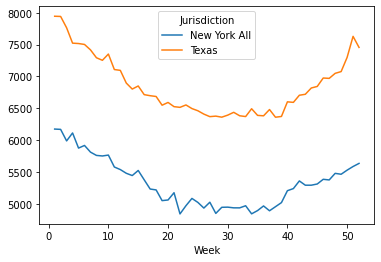

In [15]:
states = ['New York', 'New York City', 'Texas']
statedata = rawdata[rawdata['Jurisdiction'].isin(states)]
early = statedata[statedata['Year'] < 2020]

early = early.groupby(['Jurisdiction', 'Week']).sum()
early['Number of Deaths'] = early['Number of Deaths'] / 5
early = early[['Number of Deaths']]
early = early.reset_index().pivot(index='Week', columns='Jurisdiction', values='Number of Deaths')
early['New York All'] = early['New York'] + early['New York City']
ax = early[['New York All', 'Texas']].plot.line()

Text(0.5, 0, 'Week')

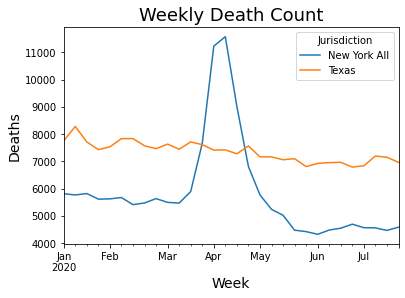

In [16]:

late = statedata[statedata['Year'] == 2020]
late = late.groupby(['Jurisdiction', 'Week']).sum()
late = late[['Number of Deaths']]
late = late.reset_index().pivot(index='Week', columns='Jurisdiction', values='Number of Deaths')
late['Week Ending'] = pd.to_datetime(statedata[statedata['Year'] == 2020].groupby(['Week'])['Week Ending Date'].max())
late = late.reset_index().set_index(['Week Ending'])
late['New York All'] = late['New York'] + late['New York City']
ax = late[['New York All', 'Texas']].plot.line()
ax.set_title('Weekly Death Count', size=18)
ax.set_ylabel('Deaths', size=14)
ax.set_xlabel('Week', size=14)


#late

AttributeError: 'Index' object has no attribute 'strftime'

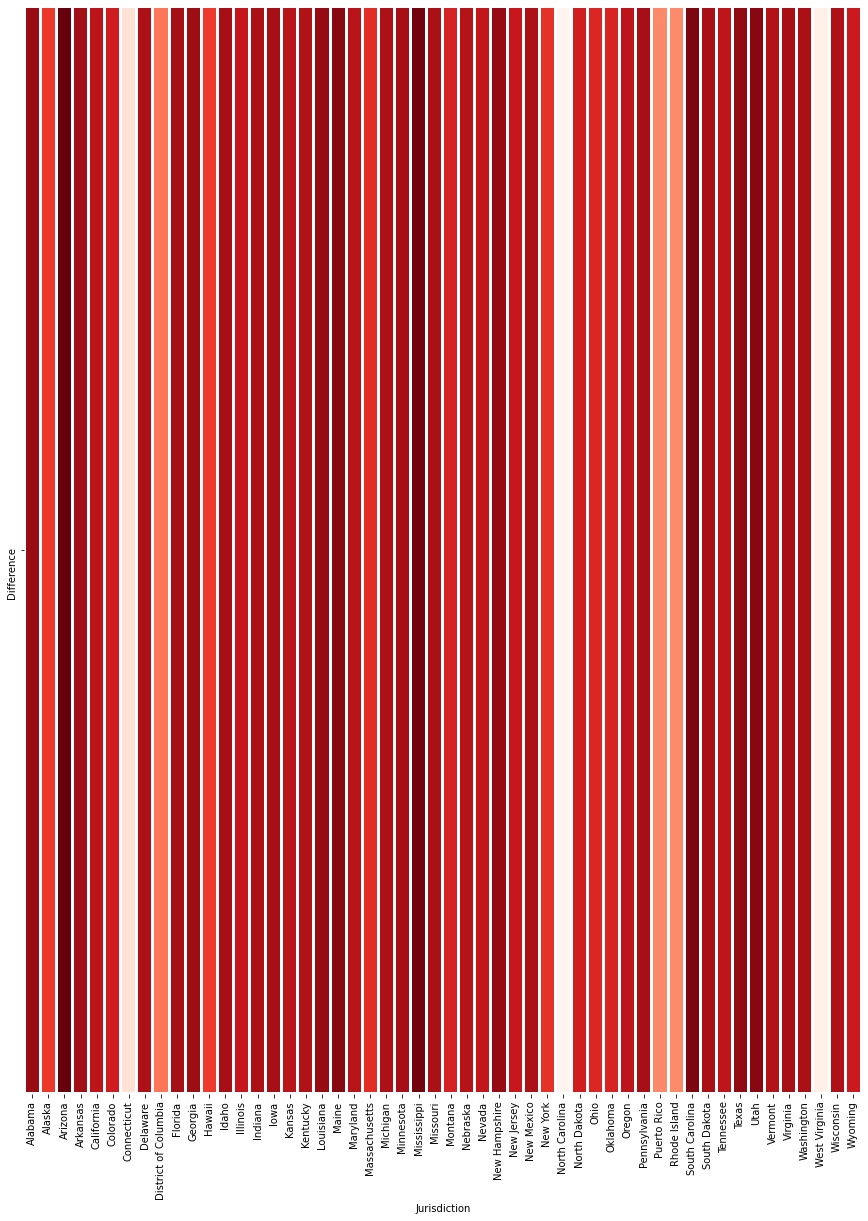

In [34]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,20))  

pvt2 = pivottable.copy().T
pvt2['New York'] = pvt2['New York'] + pvt2['New York City']
pvt2 = pvt2.drop(['New York City'], axis=1).T

df_norm_col=(pvt2-pvt2.mean())/pvt2.std()
df_norm_col_2 = df_norm_col.reindex(df_norm_col.idxmax().sort_values().index, axis=1)

sns.heatmap(df_norm_col_2.transpose(), 
            xticklabels=True, 
            yticklabels=True, 
            ax=ax, cbar=False, 
            linewidths=2, 
            linecolor='white', 
            cmap="Reds")
x_dates = df_norm_col_2.index.strftime('%Y-%m-%d').sort_values().unique()

ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_title('Normalized Excess Deaths, 2020 vs 2015-2019', size=30, pad=20)

plt.annotate('Reported deaths per week in 2020 vs the same time period\'s average in 2015-2019, and sorted by peak. Source: CDC', (0,0), (100, -70), xycoords='axes fraction', textcoords='offset points', va='top')


In [14]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [149]:
import plotly.express as px
import plotly.graph_objects as go
from chart_studio.plotly import image as PlotlyImage
from PIL import Image as PILImage
import io
import chart_studio

chart_studio.tools.set_credentials_file(username='hellodmo', api_key='TR6NU9TpOnIYl8bdfYgg')

pivottable2 = pivottable.copy()

pivottable2 = pivottable2.rename(columns=us_state_abbrev)


sortedvalues = np.sort(pivottable2.values.flatten().flatten())
mx = max(sortedvalues)
rg = max(sortedvalues) - min(sortedvalues)
mn = min(sortedvalues)
pivottable3 = (pivottable2 - mn).div(rg)
pivottable3 = pivottable3.resample(rule='8H').asfreq().interpolate()

bins = pd.qcut(sortedvalues, q=8, retbins=True)[1]
bins = (bins - bins.min()) / (bins.max() - bins.min())

colorscale = list(zip(bins, getattr(px.colors.sequential, 'Reds')))

images = []

for i in np.arange(0, pivottable3.shape[0]):
    
    data = pivottable3.iloc[i]
    fig = go.Figure(
        data=go.Choropleth(
            locations=data.index,
            z = data,
            locationmode = 'USA-states',
            colorscale = colorscale,
            showscale=False,
            zmin=0,
            zmax=1
        )
    )


    fig.update_layout(
        title= {
            "text":'Daily Excess Deaths ' + data.name.strftime('%-m-%-d-%Y'),
            'xanchor': 'center',
            'x':0.5
        },
        font=dict(
            size=18
        ),
        geo_scope='usa', # limite map scope to USA
        annotations=[
           go.layout.Annotation(
                showarrow=False,
                text='Source: CDC Excess Deaths (https://www.cdc.gov/nchs/nvss/vsrr/covid19/excess_deaths.htm)',
                xanchor='center',
                x=.5,
                yanchor='bottom',
                y=-0.2,
                font=dict(
                    size=12
                )
        ),
        go.layout.Annotation(
                showarrow=False,
                text='Darker colors indicate a higher death rate for 2020 when compared to the same time period in 2015-2019',
                xanchor='center',
                x=0.5,
                yanchor='bottom',
                y=-0.15,
                font=dict(
                    size=12
                ))]
    )


    img_bytes = fig.to_image(format='png')
    image = PILImage.open(io.BytesIO(img_bytes))
    image.save("gifdata/"+str(data.name).replace(':', '-')+".png")
    
    images.append(image)
    if i == pivottable3.shape[0] - 1:
        for i in np.arange(0,40):
            images.append(image)
    
images[0].save('gifdata/covid19-case.gif',
               save_all=True, append_images=images[1:], optimize=True, duration=75, loop=0)

![SegmentLocal](gifdata/covid19-case.gif "segment")

In [148]:
import plotly.express as px
import plotly.graph_objects as go
from chart_studio.plotly import image as PlotlyImage
from PIL import Image as PILImage
import io
import chart_studio

chart_studio.tools.set_credentials_file(username='hellodmo', api_key='TR6NU9TpOnIYl8bdfYgg')

pivottable2 = pivottable.copy()

pivottable2 = pivottable2.rename(columns=us_state_abbrev)


sortedvalues = np.sort(pivottable2.values.flatten().flatten())
mx = max(sortedvalues)
rg = max(sortedvalues) - min(sortedvalues)
mn = min(sortedvalues)
pivottable3 = (pivottable2 - mn).div(rg)
pivottable3 = pivottable3.resample(rule='8H').asfreq().interpolate()

bins = pd.qcut(sortedvalues, q=8, retbins=True)[1]
bins = (bins - bins.min()) / (bins.max() - bins.min())

colorscale = list(zip(bins, getattr(px.colors.sequential, 'Reds')))

images = []

i = 20
data = pivottable3.iloc[i]
fig = go.Figure(
    data=go.Choropleth(
        locations=data.index,
        z = data,
        locationmode = 'USA-states',
        colorscale = colorscale,
        showscale=False,
        zmin=0,
        zmax=1, 
        text="blah"
    )
)

fig.update_layout(
    title= {
        "text":'Daily Excess Deaths ' + data.name.strftime('%-m-%-d-%Y'),
        'xanchor': 'center',
        'x':0.5
    },
    font=dict(
        size=18
    ),
    geo_scope='usa', # limite map scope to USA
    annotations=[
       go.layout.Annotation(
            showarrow=False,
            text='Source: CDC Excess Deaths (https://www.cdc.gov/nchs/nvss/vsrr/covid19/excess_deaths.htm)',
            xanchor='center',
            x=.5,
            yanchor='bottom',
            y=-0.2,
            font=dict(
                size=12
            )
    ),
    go.layout.Annotation(
            showarrow=False,
            text='Darker colors indicate a higher death rate for 2020 when compared to the same time period in 2015-2019',
            xanchor='center',
            x=0.5,
            yanchor='bottom',
            y=-0.15,
            font=dict(
                size=12
            ))]
)


fig.show()

In [35]:
pivottable

,Difference
Jurisdiction,
Alabama,8.202637
Alaska,-22.466109
Arizona,20.004098
Arkansas,6.069210
California,-3.071860
Colorado,-10.503510
Connecticut,-82.427749
Delaware,2.337737
District of Columbia,-42.905524
